## HTTR is a library used to get a url and the content from the same, works similarly like the HTTP module consisting of the same functions

## Trending Data
## Past +
## Various sources (API's)

## Loading the library

In [31]:
require(httr)
require(RCurl)
require(XML)

In [35]:
req = GET("http://google.com/", path = "search", query = list(q = "MODI"))

In [22]:
webpage = getURL("https://en.wikipedia.org/wiki/Narendra_Modi")
webpage = readLines(tc <- textConnection(webpage)); close(tc)

pagetree = htmlTreeParse(webpage, error=function(...){}, useInternalNodes = TRUE)
html = xpathSApply(pagetree, "//*/p", xmlValue) 

html = unlist(strsplit(html , "\n"))
html = gsub("\t" , "" , html)
# html = sub("^[[:space:]]*(.*?)[[:space:]]*$", "\\1", html , perl = TRUE)
# html = html[!(html %in% c("", "|"))]

In [42]:
require(tm,wordcloud)

Loading required package: tm


In [43]:
corpus = Corpus(VectorSource(html))
corpus = tm_map(corpus , removePunctuation)
corpus = tm_map(corpus , stripWhitespace)
corpus = tm_map(corpus , removeWords , stopwords('english'))
corpus = tm_map(corpus , removeNumbers)

ERROR: Error in Corpus(VectorSource(html)): could not find function "Corpus"


In [186]:
inspect(corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 82

 [1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [41]:
mine = as.matrix(TermDocumentMatrix(corpus))
datavector = sort(rowSums(mine))
frequencyDF = data.frame(word = names(datavector) , frequency = datavector)

ERROR: Error in TermDocumentMatrix(corpus): could not find function "TermDocumentMatrix"


In [ ]:
frequencyDf

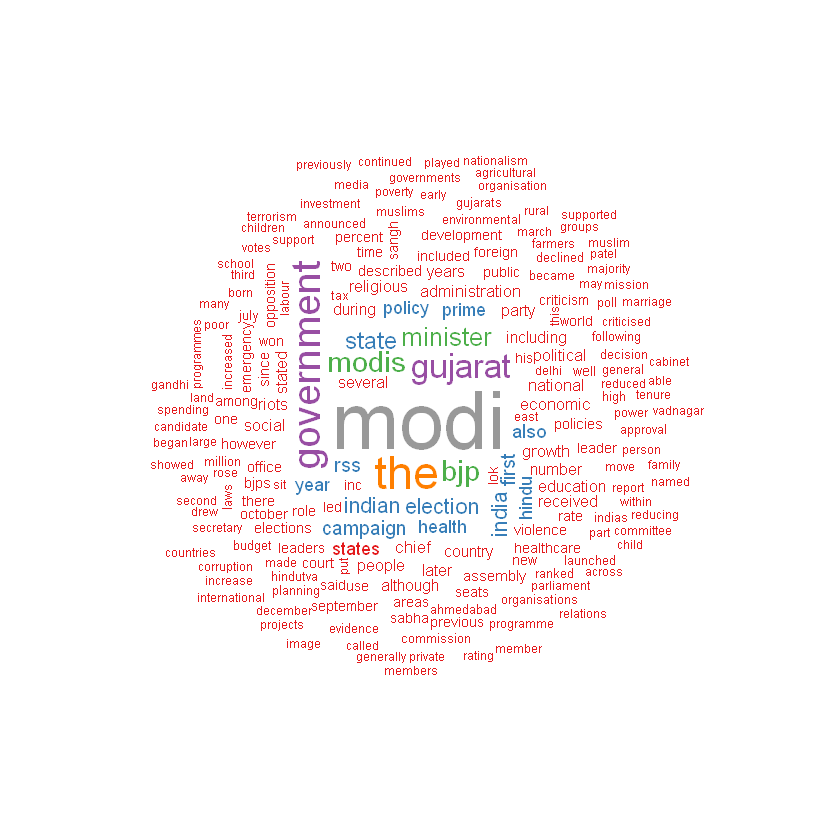

In [195]:
wordcloud(words = frequencyDF$word , freq = frequencyDF$frequency , 
          min.freq = 1 , max.words = 200 , random.order = FALSE , colors = brewer.pal(9 , 'Set1'))